In [73]:
import pandas as pd
import numpy as np

In [74]:
airquality = pd.read_csv('data/PRSA_data_2010.1.1-2014.12.31.csv')


In [75]:
airquality.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [76]:
airquality.dropna(inplace = True)

In [77]:
airquality.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [78]:
airquality = pd.concat([airquality,pd.get_dummies(airquality["cbwd"])], axis = 1)

In [79]:
airquality.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,NE,NW,SE,cv
count,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000
mean,22279.380104,2012.042771,6.513758,15.685514,11.502311,98.613215,1.750174,12.401561,1016.442896,23.866747,0.055344,0.194866,0.113897,0.322916,0.348995,0.214192
std,12658.168415,1.415311,3.454199,8.785539,6.924848,92.050387,14.433658,12.175215,10.300733,49.617495,0.778875,1.418165,0.317690,0.467596,0.476658,0.410265
min,25.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11464.000000,2011.000000,4.000000,8.000000,5.000000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,22435.000000,2012.000000,7.000000,16.000000,12.000000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,33262.000000,2013.000000,10.000000,23.000000,18.000000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,565.490000,27.000000,36.000000,1.000000,1.000000,1.000000,1.000000


In [80]:
airquality.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,NE,NW,SE,cv
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,0,0,1,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,0,0,1,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,0,0,1,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,0,0,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,0,0,1,0


In [83]:
airquality.shape

(41757, 17)

In [90]:
data = airquality.to_numpy()
i = [i for i in range(2, 17) if i not in (5, 9)]
X = data[:, i]
y = data[:, 5]
airquality.columns.values[i]

array(['month', 'day', 'hour', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir',
       'NE', 'NW', 'SE', 'cv'], dtype=object)

In [91]:
from sklearn.model_selection import train_test_split
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.1, 
                                                    random_state=1)

In [105]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(random_state=0, n_estimators = 20)
model = regr.fit(X_train, y_train)

In [106]:
model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [107]:
from sklearn import metrics
y_pred = model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 24.67836446360153
Mean Squared Error: 1650.2288056752873
Root Mean Squared Error: 40.6230083287204


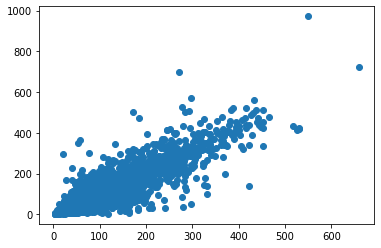

In [116]:
import matplotlib.pyplot as plt

plt.scatter(y_pred, y_test)
plt.show()

In [117]:
y_mean = np.repeat(np.mean(y_train), len(y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_mean))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_mean))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_mean)))

Mean Absolute Error: 68.16811085883356
Mean Squared Error: 8382.958478264109
Root Mean Squared Error: 91.55849757539771


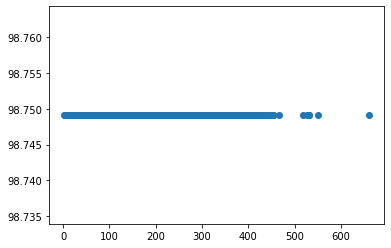

In [118]:
plt.scatter(y_pred, y_mean)
plt.show()

In [125]:
for x, y in zip(model.feature_importances_, airquality.columns.values[i]):
    print('%s: %f' % (y, x))

month: 0.127291
day: 0.161988
hour: 0.060118
DEWP: 0.253998
TEMP: 0.146293
PRES: 0.105787
Iws: 0.094635
Is: 0.001208
Ir: 0.004298
NE: 0.005288
NW: 0.027745
SE: 0.007903
cv: 0.003449
